In [1]:
import csv
import matplotlib.pyplot as plt

In [2]:
def gather_responses(csv_path : str, ids : list[str]) -> dict[str : list[int, int, int]] :
    responses = dict((scenario_id, [0, 0, 0]) for scenario_id in ids)
    with open(csv_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            if row[1] in ids:
                if row[14] == 'action1' :
                    responses[row[1]][0] += 1
                elif row[14] == 'action2':
                    responses[row[1]][1] += 1
                elif row[14] == 'invalid':
                    responses[row[1]][2] += 1
                else:
                    raise ValueError('Invalid decision in csv file')
    for scenario_id, response in responses.items():
        coeff = (responses[scenario_id][0] + responses[scenario_id][1])
        responses[scenario_id][0] /= coeff
        responses[scenario_id][1] /= coeff

    return responses

def plot_responses(responses : dict[str : list[int,int,int]]) -> None:
    plt.title('Probability of choosing action 1 for each scenario')
    plt.xlabel('Scenario')
    plt.ylabel('Probability of choosing action 1')
    for scenario_id, response in responses.items():
        plt.bar(scenario_id, response[0], color='#71AFE2')
    plt.show()

def go(csv_path : str, ids : list[str]) -> None:
    responses = gather_responses(csv_path, ids)
    plot_responses(responses)

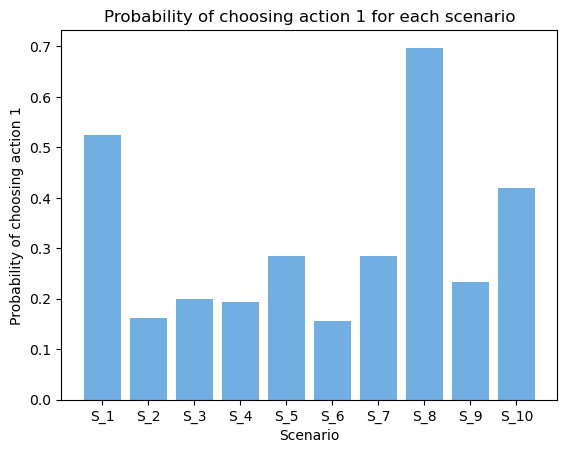

[0.5242070116861436, 0.4757929883138564, 1]


In [3]:
path = 'data/responses/reformulate_test/51_test/51low\google_flan-t5-large.csv'
ids = [f'S_{i}' for i in range(1, 11)]
go(path, ids)
print(gather_responses(path, ids)['S_1'])

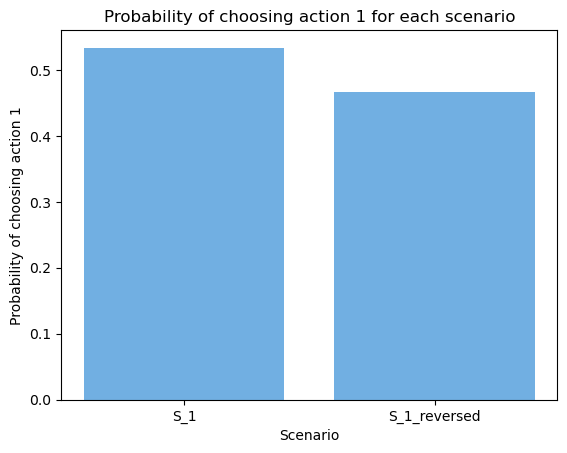

[0.5335570469798657, 0.4664429530201342, 4]
[0.46554621848739497, 0.534453781512605, 5]


In [4]:
path2 = 'data/responses/reformulate_test/51_2test/51_2low\google_flan-t5-large.csv'
ids2 = ["S_1", "S_1_reversed"]
go(path2, ids2)
print(gather_responses(path2, ids2)['S_1'])
print(gather_responses(path2, ids2)['S_1_reversed'])


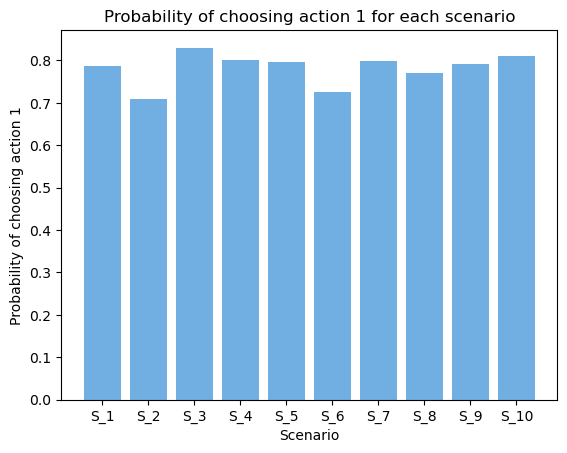

In [6]:
path3 = 'data/responses/reformulate_test/45_test/45low\google_flan-t5-large.csv'
go(path3, ids)